     |████████████████████████████████| 217.8MB 58kB/s 
     |████████████████████████████████| 204kB 53.2MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=de77820d9a3627f8b09bb07c1003ac52e6feb217c346e5f2cee0d6569e90455a
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext,Row
from pyspark.sql.types import *
from pyspark.sql import SparkSession
spark = SparkContext.getOrCreate()

In [0]:
log_txt = spark.textFile('s3://aws-logs-134528623767-us-east-1/Data/devicestatus.txt').map(lambda line: line.split(line[19])) \
      .filter(lambda fields: len(fields) == 14) \
      .map(lambda fields: [fields[12], fields[13], fields[0], fields[1], fields[2]]) \
      .filter(lambda fields: fields[0] != "0" and fields[1] != "0") \
      .map(lambda fields: [fields[0], fields[1], fields[2], fields[3].split()[0], fields[3].split()[1], fields[4]]) \
      .map(lambda fields: ",".join(fields)).saveAsTextFile('s3://aws-logs-134528623767-us-east-1/Step_1/CleanedDeviceStatus.txt')

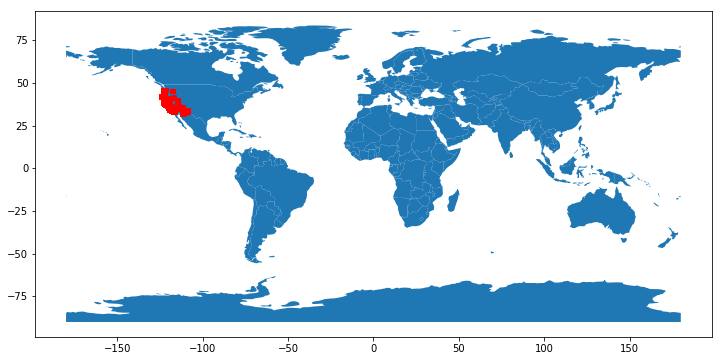

In [0]:
log_txt = spark.textFile('s3://aws-logs-134528623767-us-east-1/Data/devicestatus.txt').map(lambda line: line.split(line[19])) \
      .filter(lambda fields: len(fields) == 14) \
      .map(lambda fields: [fields[12], fields[13], fields[0], fields[1], fields[2]]) \
      .filter(lambda fields: fields[0] != "0" and fields[1] != "0") \
      .map(lambda fields: [fields[0], fields[1], fields[2], fields[3].split()[0], fields[3].split()[1], fields[4]]) \
      .map(lambda fields: ",".join(fields)).cache()


# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame
# import descartes
# import matplotlib.pyplot as plt
# import pandas as pd
# ListOfLatitude = []
# ListOfLongitude = []
# temp_var = log_txt.map(lambda k: k.split(","))
# log_df = sqlContext.createDataFrame(temp_var)

# df = log_df.selectExpr("_1 as Latitude","_2 as Longitude","_3 as Date","_4 as Manufacturer","_5 as Model","_6 as DeviceID")

# df.registerTempTable("LocationDetails")
# Latitude = [x["Latitude"] for x in df.rdd.collect()]
# Longitude = [x["Longitude"] for x in df.rdd.collect()]
# latitude_services = map(float,Latitude)
# longitude_services = map(float,Longitude)
# geometry = [Point(xy) for xy in zip(longitude_services,latitude_services)]
# gdf = GeoDataFrame(df.rdd.collect(), geometry=geometry) 
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(20, 6)), marker='o', color='red', markersize=15);

NameError: name 'cities' is not defined

AttributeError: No geometry data set yet (expected in column 'geometry'.

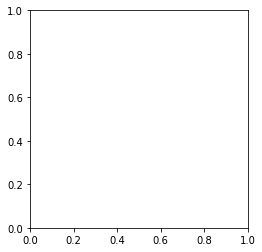

In [0]:
# !sudo yum install libgeos-3.5.0
# !sudo yum install libgeos-dev
# !sudo pip install https://github.com/matplotlib/basemap/archive/master.zip